#### Copyright 2020 Google LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Classification Project

# Group: Patricia, To'Nia, Daniela, Javi

In this project you will apply what you have learned about classification and TensorFlow to complete a project from Kaggle. The challenge is to achieve a high accuracy score while trying to predict which passengers survived the Titanic ship crash. After building your model, you will upload your predictions to Kaggle and submit the score that you get.

## The Titanic Dataset

[Kaggle](https://www.kaggle.com) has a [dataset](https://www.kaggle.com/c/titanic/data) containing the passenger list on the Titanic. The data contains passenger features such as age, gender, ticket class, as well as whether or not they survived.

Your job is to create a binary classifier using TensorFlow to determine if a passenger survived or not. The `Survived` column lets you know if the person survived. Then, upload your predictions to Kaggle and submit your accuracy score at the end of this Colab, along with a brief conclusion.


To get the dataset, you'll need to accept the competition's rules by clicking the "I understand and accept" button on the [competition rules page](https://www.kaggle.com/c/titanic/rules). Then upload your `kaggle.json` file and run the code below.

In [ ]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && cp kaggle.json ~/.kaggle/ && echo 'Done'
! kaggle competitions download -c titanic
! ls

**Note: If you see a "403 - Forbidden" error above, you still need to click "I understand and accept" on the [competition rules page](https://www.kaggle.com/c/titanic/rules).**

Three files are downloaded:

1. `train.csv`: training data (contains features and targets)
1. `test.csv`: feature data used to make predictions to send to Kaggle
1. `gender_submission.csv`: an example competition submission file

## Step 1: Exploratory Data Analysis

Perform exploratory data analysis and data preprocessing. Use as many text and code blocks as you need to explore the data. Note any findings. Repair any data issues you find.

#### **Student Solution**

##### **Import TensorFlow**

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
tf.__version__

##### **Import Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv('train.csv')

##### **Data Preprocessing - Replace Data**

In [ ]:
train_df = train_df.drop(labels=['Cabin','Name','Ticket'], axis=1)

In [ ]:
# average age for missing values
avg_age = train_df['Age'].mean()
train_df['Age'].replace(np.nan, avg_age, inplace=True)

# most people came from Southhampton
train_df['Embarked'].replace(np.nan, value='S', inplace=True)

train_df.isna().any()

In [ ]:
target_column = 'Survived'
feature_columns = [c for c in train_df.columns if c != target_column]
numeric_feature_columns = [c for c in feature_columns if c != 'Sex' and c != 'Embarked']

target_column, feature_columns, numeric_feature_columns

###### **One-Hot Encoding** ######

In [ ]:
# Sex
for op in sorted(train_df['Sex'].unique()):
  op_col = op.lower().replace(' ', '_').replace('<', '')
  train_df[op_col] = (train_df['Sex'] == op).astype(int)
  feature_columns.append(op_col)

feature_columns.remove('Sex')

# Embarked
for op in train_df['Embarked'].unique():
  op_col = op.lower().replace(' ', '_').replace('<', '')
  train_df[op_col] = (train_df['Embarked'] == op).apply(int)
  feature_columns.append(op_col)

feature_columns.remove('Embarked')

train_df

###### **Correlation** ######

In [ ]:
import seaborn as sns

corr_axes = []
for i in range(len(train_df.corr())):
  corr_axes.append(train_df.corr().columns[i])

sns.heatmap(
    train_df.corr(),
    yticklabels=corr_axes,
    xticklabels=corr_axes,
    cmap='coolwarm',
)

train_df.corr()

###### **Features and Targets**

In [ ]:
# only using these features
feature_columns = ['female','Fare','Parch','c','Age','SibSp']
numeric_feature_columns = feature_columns
numeric_feature_columns, target_column

###### **Standardize Data**

In [ ]:
train_df.loc[:, numeric_feature_columns] = ((
    train_df[numeric_feature_columns] - 
      train_df[numeric_feature_columns].min()) / (
          train_df[numeric_feature_columns].max() - train_df[numeric_feature_columns].min()))

train_df[numeric_feature_columns].describe()

In [ ]:
FEATURES = numeric_feature_columns
TARGET = target_column

###### **Stratify Data**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    train_df[numeric_feature_columns],
    train_df[target_column],
    test_size=0.2,
    stratify=train_df[target_column] # stratified split
    )

---

## Step 2: The Model

Build, fit, and evaluate a classification model. Perform any model-specific data processing that you need to perform. If the toolkit you use supports it, create visualizations for loss and accuracy improvements. Use as many text and code blocks as you need to explore the data. Note any findings.

**Student Solution**

###### **Sk-learn SGD**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

estimator = Pipeline(
  steps=[
    ['scale', StandardScaler()],
    ['classifier', SGDClassifier()],
  ]
)

scores = cross_val_score(
    estimator,
    x_train[numeric_feature_columns],
    y_train,
    cv=5,
)

estimator.fit(x_train, y_train)

predictions = estimator.predict(x_test)
_ = plt.hist(predictions)
plt.show()
accuracy_score(y_test, predictions)

---

## Step 3: Make Predictions and Upload To Kaggle

In this step you will make predictions on the features found in the `test.csv` file and upload them to Kaggle using the [Kaggle API](https://github.com/Kaggle/kaggle-api). Use as many text and code blocks as you need to explore the data. Note any findings.

### **Student Solution**

##### **Data Preprocessing - Replace Data**

In [ ]:
test_df = pd.read_csv('test.csv')
test_df

In [ ]:
test_df = test_df.drop(labels=['Cabin','Name','Ticket'], axis=1)

In [ ]:
# average age for missing values
avg_age = test_df['Age'].mean()
test_df['Age'].replace(np.nan, avg_age, inplace=True)

# most people came from Southhampton
test_df['Embarked'].replace(np.nan, value='S', inplace=True)

# average fair for missing value
avg_fare = test_df['Fare'].mean()
print(avg_fare)
test_df['Fare'].replace(np.nan, avg_fare, inplace=True)

test_df.isna().any()

In [ ]:
target_column = 'Survived'
feature_columns = [c for c in test_df.columns if c != target_column]
numeric_feature_columns = [c for c in feature_columns if c != 'Sex' and c != 'Embarked' and c != 'PassengerId']

target_column, feature_columns, numeric_feature_columns

##### One-Hot Encoding

In [ ]:
# Sex
for op in sorted(test_df['Sex'].unique()):
  op_col = op.lower().replace(' ', '_').replace('<', '')
  test_df[op_col] = (test_df['Sex'] == op).astype(int)
  feature_columns.append(op_col)

feature_columns.remove('Sex')

# Embarked
for op in test_df['Embarked'].unique():
  op_col = op.lower().replace(' ', '_').replace('<', '')
  test_df[op_col] = (test_df['Embarked'] == op).apply(int)
  feature_columns.append(op_col)

feature_columns.remove('Embarked')

test_df[feature_columns]

In [ ]:
test_df.loc[:, numeric_feature_columns] = ((
    test_df[numeric_feature_columns] - 
      test_df[numeric_feature_columns].min()) / (
          test_df[numeric_feature_columns].max() - test_df[numeric_feature_columns].min()))

test_df[numeric_feature_columns].describe()

In [ ]:
feature_columns = ['female','Fare','Parch','c','Age','SibSp']
numeric_feature_columns = feature_columns
numeric_feature_columns, target_column

##### **Predictions**

In [ ]:
test_df[feature_columns]

In [ ]:
kaggle_predictions = estimator.predict(test_df[feature_columns])

_ = plt.hist(kaggle_predictions)

##### **Upload to Kaggle**

In [ ]:
import csv

kaggle_df = pd.DataFrame()
kaggle_df['PassengerID'] = test_df['PassengerId']
kaggle_df['Survived'] = kaggle_predictions
kaggle_df.to_csv('titanic_predictions.csv', index=False)

kaggle_df

What was your Kaggle score?

> First Try : 0.72248, Step 4 - Iterative Step: 0.77990

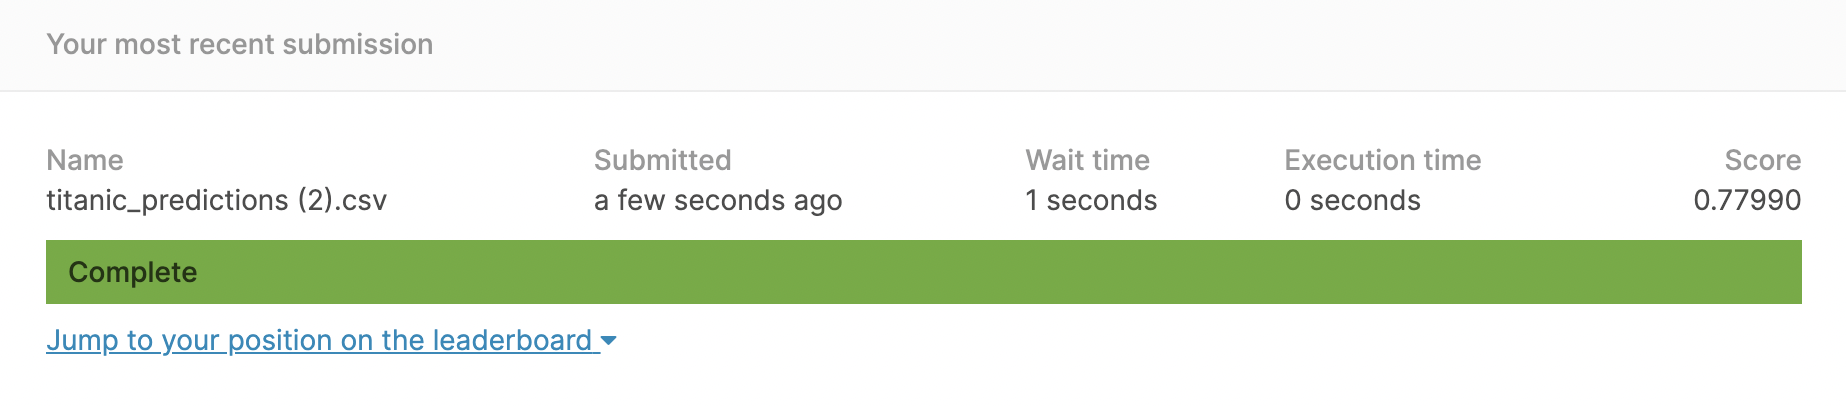

---

## Step 4: Iterate on Your Model

In this step you're encouraged to play around with your model settings and to even try different models. See if you can get a better score. Use as many text and code blocks as you need to explore the data. Note any findings.

###### **Neural Network**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    train_df[numeric_feature_columns], train_df[target_column], test_size=0.2, stratify=train_df[target_column])

x_train.shape, x_test.shape

In [ ]:
import tensorflow as tf

# Earlystopping
callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss', patience=5 
    # verbose=0, mode='auto', baseline=None, restore_best_weights=False
)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu, 
                          input_shape=(len(feature_columns),)),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=500, verbose=0, callbacks=callback)

history.history['accuracy'][-1]

In [ ]:
predictions = model.predict(x_test)

In [ ]:
import math

for i in range(len(predictions)):
  if predictions[i] >= 0.6:
    predictions[i] = math.ceil(predictions[i])
  else:
    predictions[i] = math.floor(predictions[i])

predictions.astype(np.int32)

print(accuracy_score(y_test, predictions))

_ = plt.hist(predictions)

In [ ]:
predictions = model.predict(test_df[feature_columns])
for i in range(len(predictions)):
  if predictions[i] >= 0.5:
    predictions[i] = math.ceil(predictions[i])
  else:
    predictions[i] = math.floor(predictions[i])

predictions = predictions.astype(np.int32)

_ = plt.hist(predictions)

In [ ]:
import csv

kaggle_df = pd.DataFrame()
kaggle_df['PassengerID'] = test_df['PassengerId']
kaggle_df['Survived'] = predictions
kaggle_df.to_csv('titanic_predictions.csv', index=False)

kaggle_df

---